CSV Header: ['Date', 'Close']
CSV Header: ['ï»¿Date', 'Close']


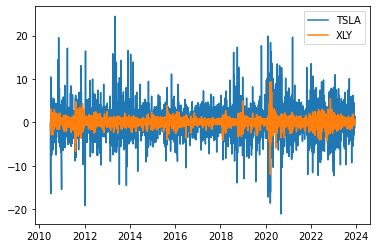

,Delta_x,Delta_y
Date,,
2023-12-08,0.494560,0.409544
2023-12-07,1.366086,0.796819
2023-12-06,0.272286,-0.390613
2023-12-05,1.332881,-0.056896
2023-12-04,-1.360801,-0.540849
...,...,...
2010-07-06,-16.406250,0.535899
2010-07-02,-12.328767,-0.466239
2010-07-01,-8.176101,-0.324048


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import csv
from datetime import datetime
import numpy as np  
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

tsla = 'c:/Users/wston/Documents/tsla_full.csv'
xly = 'c:/users/wston/Documents/spx_full.csv'
tsla1 = 'c:/users/wston/Documents/tsla1.csv'
xly1 = 'c:/users/wston/Documents/spx1.csv'

tsla_prof={'Date':[],'Close':[]}
xly_prof={'Date':[],'Close':[]}

with open(tsla, newline='') as tsla_read:
    tsla_reader = csv.reader(tsla_read, delimiter=',')

    tsla_header = next(tsla_reader)
    print(f"CSV Header: {tsla_header[0::1]}")

    with open(tsla1, mode='w') as tsla_out:
        tsla_writer = csv.writer(tsla_out)
        tsla_prof = {jump[0]:jump[1] for jump in tsla_reader}

        for i,k in tsla_reader:
            tsla_prof['Date'].append(
    	        {
                    (i[0:]),
                    
                }
        )  
            tsla_prof['Close'].append(
                {
                    (k[::1])
                    
                }
                    
        ) 

t_chunklen = 1
t_list = list(tsla_prof.items())
td = [dict(t_list[i:i + t_chunklen]) for i in range(0, len(t_list), t_chunklen)]


with open(xly, newline='') as xly_read:
    xly_reader = csv.reader(xly_read, delimiter=',') 

    xly_header = next(xly_reader)
    print(f"CSV Header: {xly_header[0::1]}")

    with open(xly1, mode='w') as xly_out:
        xly_writer = csv.writer(xly_out)
        xly_prof = {roll[0]:roll[1] for roll in xly_reader}

        for x,y in xly_reader:
            xly_prof['Date'].append(
    	        {
                    (x[0:]),
                    
                }
        )  
            xly_prof['Close'].append(
                {
                    (y[::1])
                    
                }
        ) 
        
v_chunklen = 1
v_list = list(xly_prof.items())
vd = [dict(v_list[l:l + v_chunklen]) for l in range(0, len(v_list), v_chunklen)]


t_df = pd.DataFrame(t_list)
v_df = pd.DataFrame(v_list)

t_df.columns = ['Date', 'Close']
v_df.columns = ['Date', 'Close']

t_df['Date'] = pd.to_datetime(t_df["Date"])
t_df['Close'] = t_df['Close'].astype(float)
t_df['Close'].astype(int)

v_df['Date'] = pd.to_datetime(v_df["Date"])
v_df['Close'] = v_df['Close'].astype(float)
v_df['Close'].astype(int)
 
t_df.set_index('Date', inplace=True)
v_df.set_index('Date', inplace=True)

t_df['Delta'] = t_df['Close'].pct_change(periods=-1)*100
v_df['Delta'] = v_df['Close'].pct_change(periods=-1)*100

m_delta = pd.merge(t_df['Delta'],v_df['Delta'],how='inner',left_index=True,right_index=True)

bingo = plt.plot(m_delta.index,m_delta['Delta_x'],m_delta['Delta_y'])
plt.legend(iter(bingo),('TSLA', 'XLY'))
plt.show()

m_delta



In [59]:
m_df= pd.merge(t_df['Close'],v_df['Close'],how='inner',left_index=True,right_index=True)
m_df
df_reg = m_df[['Close_x','Close_y']].copy()
df_reg.dropna(axis='columns')
df_reg.reset_index(drop=True, inplace=True)
df_reg

,Close_x,Close_y
0,243.84,4604.37
1,242.64,4585.59
2,239.37,4549.34
3,238.72,4567.18
4,235.58,4569.78
...,...,...
3381,1.07,1028.06
3382,1.28,1022.58
3383,1.46,1027.37
3384,1.59,1030.71


In [60]:
X=df_reg[['Close_x']]
y=df_reg[['Close_y']]

regressor = LinearRegression()
regressor.fit(X, y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_) 

Weight coefficients:  [[9.14987893]]
y-axis intercept:  [1938.59043121]


In [61]:
predictions = regressor.predict(X)
print(f"True output: {y['Close_y'][0]}")
print(f"Predicted output: {predictions[0][0]}")
print(f"Prediction Error: {predictions[0][0]-y['Close_y'][0]}")

True output: 4604.37
Predicted output: 4169.69691012055
Prediction Error: -434.67308987945034


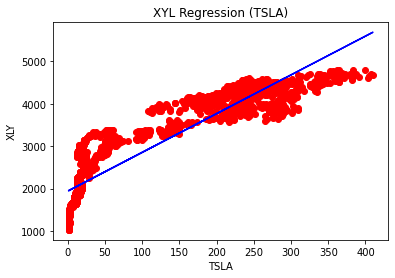

In [62]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('XYL Regression (TSLA)')
plt.xlabel('TSLA')
plt.ylabel('XLY')
plt.show()

In [63]:
yy=y.to_numpy()
yy=yy.flatten()
predictions_prime=predictions.flatten()
df_pred=pd.DataFrame({'Predictions': predictions_prime, 'Actual': yy, 'Error': predictions_prime-yy})
df_pred

,Predictions,Actual,Error
0,4169.696910,4604.37,-434.673090
1,4158.717055,4585.59,-426.872945
2,4128.796951,4549.34,-420.543049
3,4122.849530,4567.18,-444.330470
4,4094.118910,4569.78,-475.661090
...,...,...,...
3381,1948.380802,1028.06,920.320802
3382,1950.302276,1022.58,927.722276
3383,1951.949254,1027.37,924.579254
3384,1953.138739,1030.71,922.428739


In [64]:
x_min = X.min()
x_max = X.max()

y_min_actual = y.min()
y_max_actual = y.max()

In [65]:
y_min = 1938.59043121 + 9.14987893 * x_min
y_max = 1938.59043121 + 9.14987893 * x_max
print(f"Actual Min Value: {y_min_actual[0]}")
print(f"Calculated Min Value: {y_min[0]}")
print(f"Actual Max Value: {y_max_actual[0]}")
print(f"Calculated Max Value: {y_max[0]}")

Actual Min Value: 1022.58
Calculated Min Value: 1948.1978040865
Actual Max Value: 4796.56
Calculated Max Value: 5689.7662961421


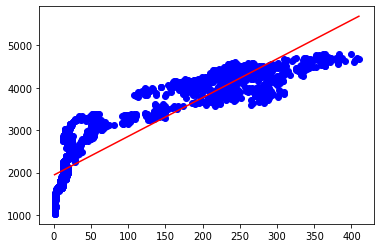

In [66]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [67]:
# Use our model to predict a value
predicted = regressor.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(yy, predicted)
r2 = r2_score(yy, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 244673.22872638167
R-squared (R2 ): 0.7773495696629346


In [68]:
regressor.score(X, y)

0.7773495696629346

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7982575821635002